In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image
from matplotlib import cm
from torch.utils.data import Dataset, DataLoader

In [3]:
all_data_files = glob('./data/*')

In [215]:
def clean_data(data):
    data[data == -1] = 0
    data[143:167, 223:247][data[143:167, 223:247] == 0] = 1
    return data 

In [293]:
data = clean_data(np.load(all_data_files[0]))
resized_data = resize_data(data)

In [294]:
data.shape

(304, 448)

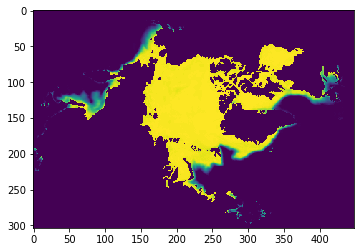

In [295]:
plt.imshow(data)

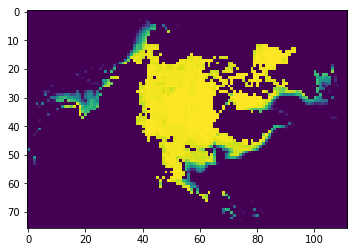

In [296]:
plt.imshow(resized_data)

In [4]:
def clean_data(data):
    data[data == -1] = 0
    data[143:167, 223:247][data[143:167, 223:247] == 0] = 1
    return data 

def resize_data(data):
    im = Image.fromarray(np.uint8(cm.gist_earth(data, alpha=None)*255)[:, :, :3])
    resized_data = np.array(im.resize((112, 76)).convert('L'))
    return resized_data/resized_data.max()


class SeaIceDataset(Dataset):
    
    def __init__(self, seq_len, data_folder='./data/*'):
        self.seq_len = seq_len
        self.data_files = glob(data_folder)
        
    def __len__(self):
        return len(self.data_files) - (self.seq_len + 1)
    
    def __getitem__(self, ix):
        X = np.array([resize_data(clean_data(np.load(d))).flatten() for d in self.data_files[ix:ix+self.seq_len]])
        y = resize_data(clean_data(np.load(self.data_files[ix+self.seq_len+1]))).flatten()
        return X, y
    
final = resize_data(clean_data(np.load(all_data_files[-1]))).flatten()    
dataset = SeaIceDataset(3)
assert(np.allclose(final, dataset[len(dataset)-1][1]))

In [298]:
dataset = SeaIceDataset(3)

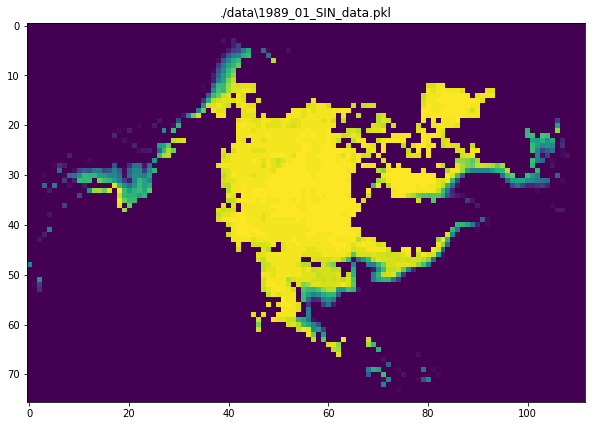

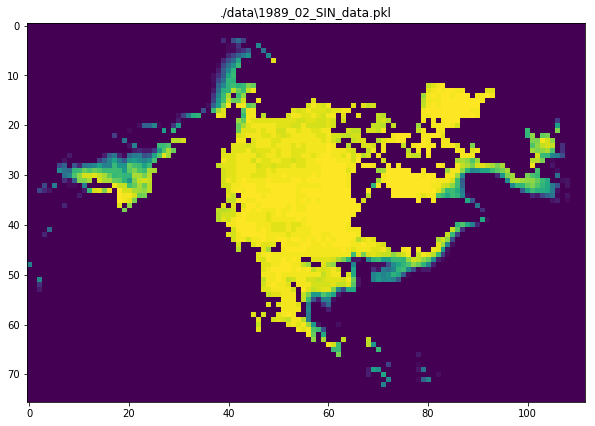

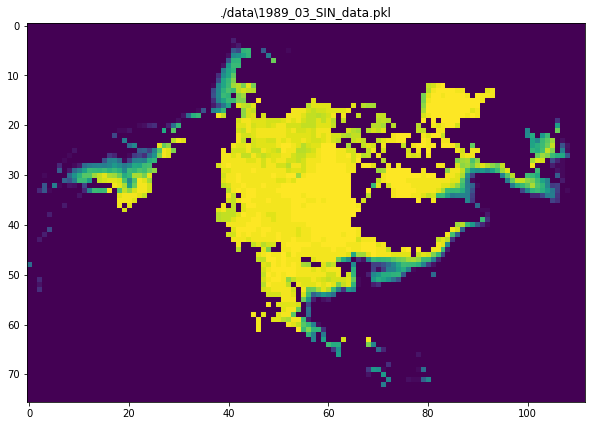

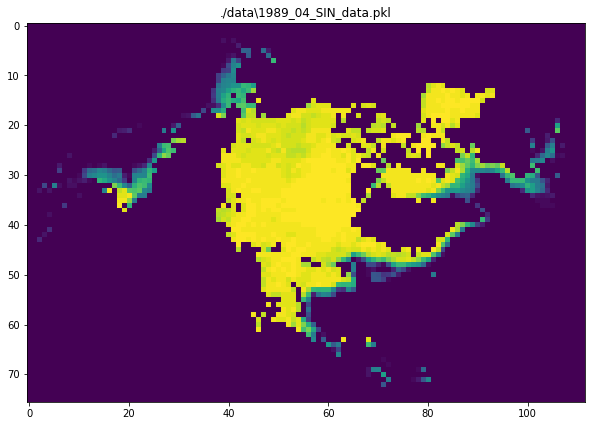

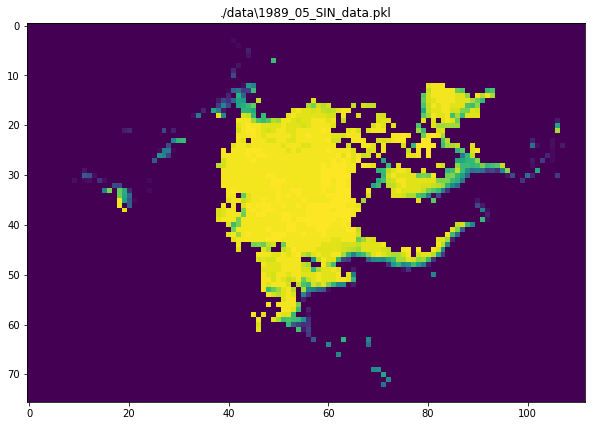

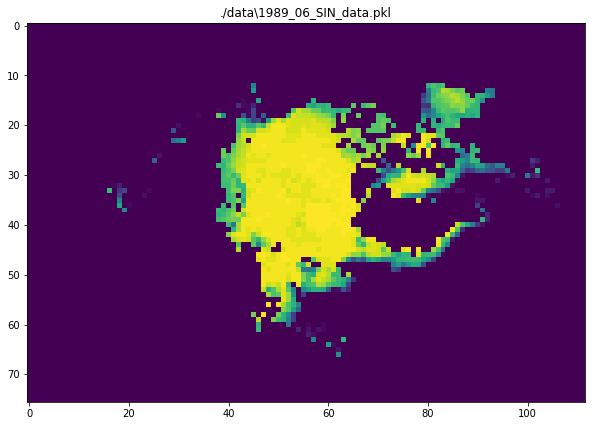

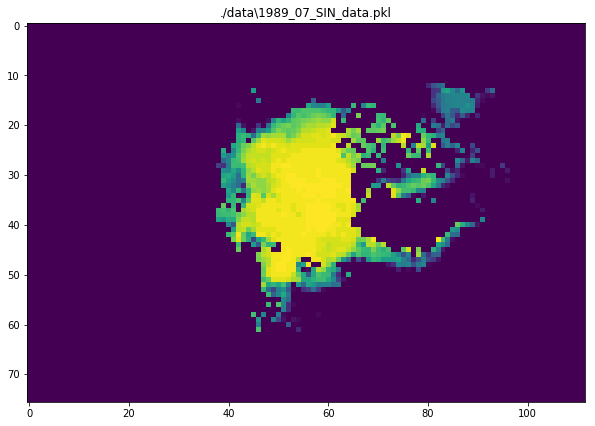

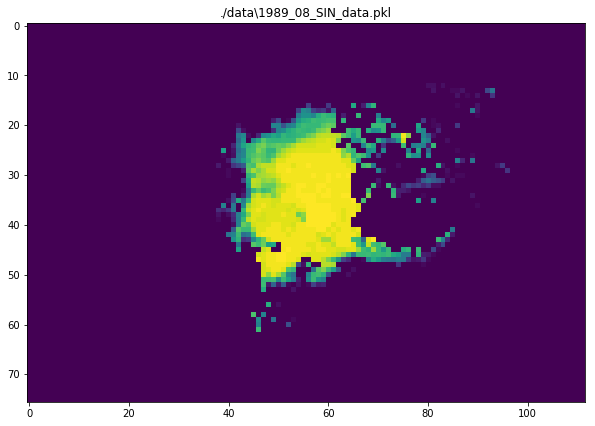

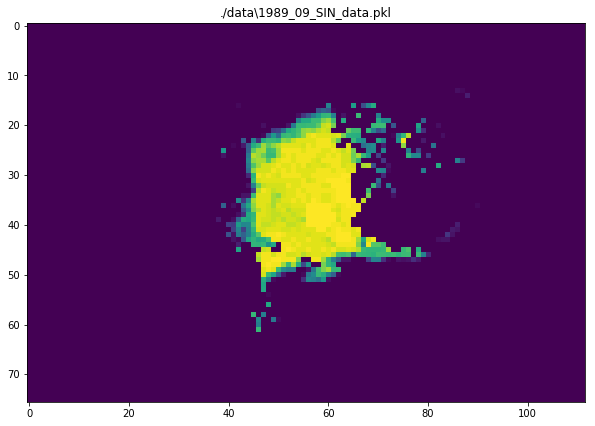

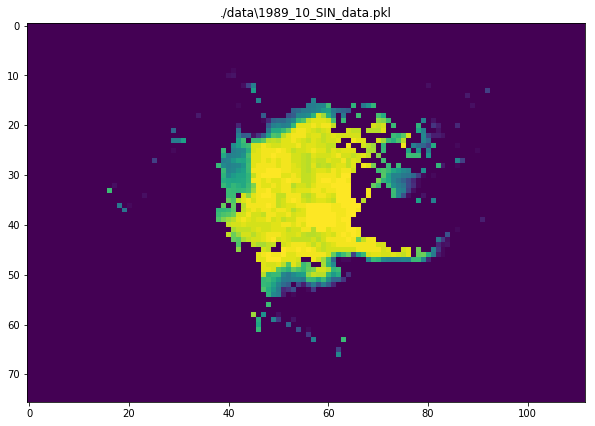

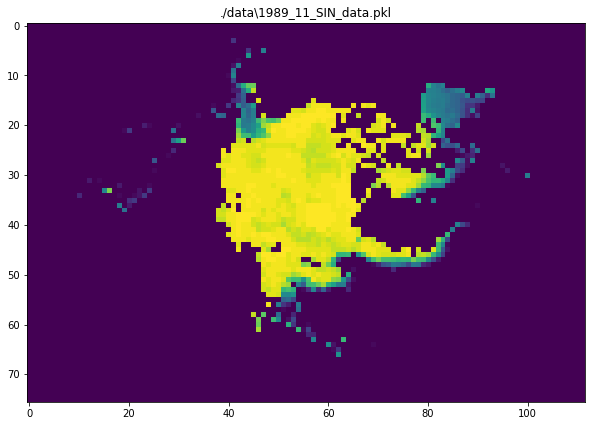

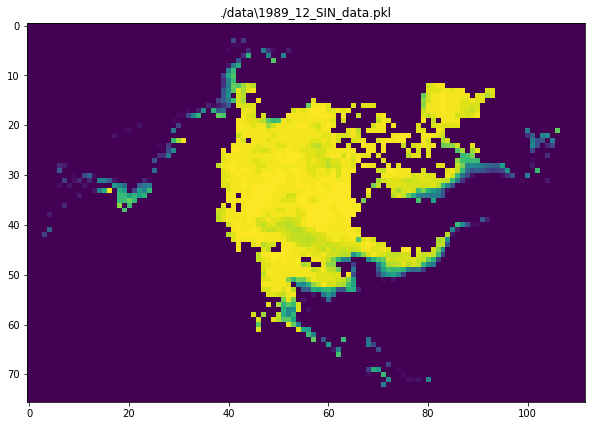

In [198]:
seqs = []
for d in all_data_files[:12]:
    data = clean_data(np.load(d))
    plt.figure(figsize=(10,10))
    plt.title(d)
    plt.imshow(resize_data(data))
    seqs.append(resize_data(data).flatten())

# Examining input data in context of LSTM

In [5]:
def make_seqs(xs, seq_length, batch_size, input_size):
    return torch.cat((tuple(map(lambda x: torch.tensor(x, dtype=torch.float32), xs)))).view(seq_length, batch_size, input_size)

In [202]:
seqs[0].shape

(8512,)

In [61]:
batch_size = 1
seq_length = 12
input_size = 130000
hidden_size = 8512

In [59]:
si_dataset = SeaIceDataset(6)

In [65]:
mod = torch.nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=1)

RuntimeError: $ Torch: not enough memory: you tried to allocate 251GB. Buy new RAM! at ..\aten\src\TH\THGeneral.cpp:201

In [32]:
h = (torch.randn(1, 1, hidden_size),
     torch.randn(1, 1, hidden_size))

In [33]:
optimizer = torch.optim.Adam(mod.parameters())

In [34]:
criterion = torch.nn.MSELoss()

In [38]:
dl = DataLoader(si_dataset,shuffle=True)

In [41]:
for X, y in dl:
    print("WOW")
    optimizer.zero_grad()
    
    xs = make_seqs(X, 6, 1, input_size)
    
    for x in xs:
        o, h = mod(x.view(1,1,-1), h)
    
    y = torch.tensor(y, dtype=torch.float)
    loss = -criterion(o, y)
    loss.backward(retain_graph=True)
    optimizer.step()

WOW


c:\users\stone\desktop\spring2019\computationaltopology\project\proj_64\lib\site-packages\ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
c:\users\stone\desktop\spring2019\computationaltopology\project\proj_64\lib\site-packages\ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.


WOW
WOW
WOW
WOW
WOW
WOW
WOW
WOW


KeyboardInterrupt: 

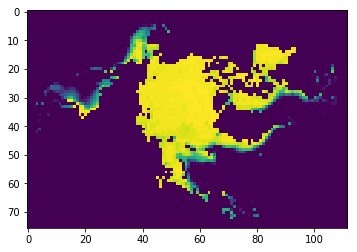

In [42]:
plt.imshow(x[0].data.numpy().reshape(76,112))

In [46]:
X, y = si_dataset[12]

In [48]:
X = make_seqs(X, 6, 1, input_size)

In [49]:
o,h = mod(X)

In [50]:
o

tensor([[[ 0.1063, -0.6767, -0.5749,  ...,  0.7614, -0.7565, -0.3094]],

        [[ 0.4483, -0.9639, -0.9444,  ...,  0.9640, -0.9639,  0.2511]],

        [[-0.3912, -0.9950, -0.9922,  ...,  0.9951, -0.9950,  0.8488]],

        [[-0.8822, -0.9993, -0.9989,  ...,  0.9993, -0.9993,  0.9780]],

        [[-0.9827, -0.9999, -0.9999,  ...,  0.9999, -0.9999,  0.9970]],

        [[-0.9976, -1.0000, -1.0000,  ...,  1.0000, -1.0000,  0.9996]]],
       grad_fn=<StackBackward>)

In [52]:
h[1]

tensor([[[-3.3626, -5.9977, -5.7644,  ...,  5.9997, -5.9977,  4.2446]]],
       grad_fn=<StackBackward>)

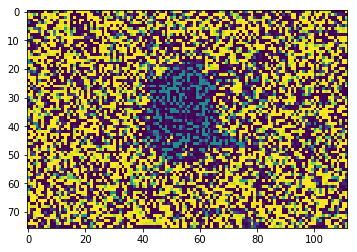

In [55]:
plt.imshow(h[1].data.numpy().reshape(76, 112))

In [249]:
inputs.shape

torch.Size([5, 1, 3])

In [250]:
batch_size = 1
seq_length = 3
input_size = 100
hidden_size = 3

In [251]:
mod = torch.nn.LSTM(input_size=input_size, hidden_size=hidden_size)

In [252]:
data1.shape

(100,)

In [253]:
data1 = data.flatten()[:100]
data2 = data.flatten()[100:200]
data3 = data.flatten()[200:300]

Seq Len x Batch x Size


In [257]:
torch.cat((tuple(map(lambda x: torch.randn(1, input_size), [data1, data2, data3])))).shape

torch.Size([3, 100])

In [268]:
x = torch.cat((tuple(map(lambda x:  torch.randn(1, input_size), [data1, data2, data3])))).view(seq_length, batch_size, input_size)
x.shape, x.dtype

(torch.Size([3, 1, 100]), torch.float32)

In [281]:
x = torch.cat((tuple(map(lambda x: torch.tensor(x, dtype=torch.float32), [data1, data2, data3])))).view(seq_length, batch_size, input_size)
x.shape, x.dtype

(torch.Size([3, 1, 100]), torch.float32)

In [278]:
hiddens = (torch.randn(1,1, hidden_size), torch.randn(1,1,hidden_size))

In [279]:
o, h = mod(x, hiddens)
o, h

RuntimeError: Expected object of scalar type Float but got scalar type Double for argument #4 'mat1'

In [148]:
mod = torch.nn.LSTM(input_size=input_size, hidden_size=hidden_size)

In [147]:
lstm = torch.nn.LSTM(3, 3)  # Input dim is 3, output dim is 3
inputs = [torch.randn(1, 3) for _ in range(5)]  # make a sequence of length 5

# initialize the hidden state.
hidden = (torch.randn(1, 1, 3),
          torch.randn(1, 1, 3))
# for i in inputs:
#     # Step through the sequence one element at a time.
#     # after each step, hidden contains the hidden state.
#     out, hidden = lstm(i.view(1, 1, -1), hidden)

# alternatively, we can do the entire sequence all at once.
# the first value returned by LSTM is all of the hidden states throughout
# the sequence. the second is just the most recent hidden state
# (compare the last slice of "out" with "hidden" below, they are the same)
# The reason for this is that:
# "out" will give you access to all hidden states in the sequence
# "hidden" will allow you to continue the sequence and backpropagate,
# by passing it as an argument  to the lstm at a later time
# Add the extra 2nd dimension
inputs = torch.cat(inputs).view(len(inputs), 1, -1)
hidden = (torch.randn(1, 1, 3), torch.randn(1, 1, 3))  # clean out hidden state
out, hidden = lstm(inputs, hidden)
print(inputs.shape)
print(out)
print(hidden)

torch.Size([5, 1, 3])
tensor([[[ 0.0859, -0.1804,  0.1008]],

        [[-0.0381, -0.3172, -0.0133]],

        [[-0.0539, -0.3373,  0.0405]],

        [[-0.1510, -0.2020, -0.0245]],

        [[ 0.0404, -0.3629, -0.1642]]], grad_fn=<StackBackward>)
(tensor([[[ 0.0404, -0.3629, -0.1642]]], grad_fn=<StackBackward>), tensor([[[ 0.1371, -0.5139, -0.2110]]], grad_fn=<StackBackward>))


In [143]:
inputs

tensor([[[-0.8551,  0.8662,  1.2563]],

        [[ 1.8073, -0.4190, -2.4308]],

        [[ 1.4667,  0.3441, -0.1738]],

        [[ 0.1573, -0.3300, -0.1598]],

        [[-1.5100,  0.6503,  0.4261]]])

In [144]:
inputs.shape

torch.Size([5, 1, 3])